In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score
from sklearn.model_selection import KFold, cross_val_score
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

## 1. Load in the data

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving Diabetes Study File 10K Dec 14 2017.xlsx to Diabetes Study File 10K Dec 14 2017.xlsx


In [ ]:
df = pd.read_excel('Diabetes Study File 10K Dec 14 2017.xlsx')

# 2. Data Exploration (EK)

In [ ]:
df.head()

,Age_at_Exam,sBP,sBP_Date,BMI,BMI_Date,LDL,LDL_Date,HDL,HDL_Date,A1c,...,leastO(A1c_Date),leastO(DM_OnsetDate),leastO(FBS_Date),LeastOfAll,A1C_BEF_DM,FBS_BEF_DM,Patient_ID,DM_Onset_Revised,DM_Onset_Revised_1YrPrior,DIABETES
0,65,126.0,2013-06-11,31.000000,2013-06-11,1.66,2013-06-14,1.11,2013-06-14,5.4,...,NaN,NaN,NaN,NaN,NaN,NaN,4001000000255903,NaT,NaT,No
1,62,135.0,2014-06-19,25.846483,2014-10-17,2.49,2014-05-28,1.37,2014-05-28,5.8,...,NaN,NaN,NaN,NaN,NaN,NaN,4001000000256456,NaT,NaT,No
2,63,133.0,2012-07-31,30.900000,2011-12-01,1.65,2012-06-01,NaN,NaT,6.1,...,NaN,NaN,NaN,NaN,NaN,NaN,1001000000000054,NaT,NaT,No
3,51,136.0,2014-01-06,56.710775,2014-01-06,2.80,2014-01-14,1.94,2014-01-14,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,4001000000259496,NaT,NaT,No
4,40,123.0,2015-06-12,33.067867,2015-06-12,2.48,2015-06-24,1.17,2015-06-24,5.8,...,NaN,NaN,NaN,NaN,NaN,NaN,4001000000262094,NaT,NaT,No


In [ ]:
df.describe()

,Age_at_Exam,sBP,BMI,LDL,HDL,A1c,TG,FBS,FBS>DM,Total_Cholesterol,Diabetes,Depression,HTN,OA,COPD,leastO(A1c_Date),leastO(DM_OnsetDate),leastO(FBS_Date),LeastOfAll,Patient_ID
count,10000.000000,9996.000000,10000.000000,9939.000000,9928.000000,10000.000000,9947.000000,10000.000000,10000.000000,9793.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,5406.000000,5137.000000,5411.000000,5137.000000,1.000000e+04
mean,63.197600,130.394358,30.415909,2.540959,1.321803,6.266754,1.553615,6.311903,0.922800,4.558164,0.513900,0.212200,0.642400,0.315600,0.098600,41210.426193,40014.597820,41125.007577,39943.999221,3.940949e+15
std,13.127627,17.018794,6.831567,0.949213,0.402217,0.954380,1.021511,1.733209,0.266922,1.136145,0.499832,0.408886,0.479317,0.464778,0.298139,723.369067,1021.388765,766.210873,971.454948,2.401364e+15
min,18.000000,60.000000,1.376352,0.070000,0.160000,3.400000,0.240000,2.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37966.000000,32509.000000,38023.000000,32509.000000,1.001000e+15
25%,54.000000,120.000000,25.898654,1.820000,1.040000,5.700000,0.950000,5.200000,1.000000,3.710000,0.000000,0.000000,0.000000,0.000000,0.000000,40785.000000,39286.000000,40643.000000,39254.000000,2.001000e+15
50%,64.000000,130.000000,29.300000,2.400000,1.250000,6.000000,1.320000,5.900000,1.000000,4.450000,1.000000,0.000000,1.000000,0.000000,0.000000,41402.000000,39944.000000,41298.000000,39918.000000,4.001000e+15
75%,73.000000,140.000000,33.790000,3.160000,1.540000,6.600000,1.890000,6.900000,1.000000,5.300000,1.000000,0.000000,1.000000,1.000000,0.000000,41773.000000,40770.000000,41745.000000,40687.000000,4.001000e+15
max,90.000000,229.000000,73.400000,8.630000,3.960000,14.300000,22.640000,23.500000,1.000000,12.660000,1.000000,1.000000,1.000000,1.000000,1.000000,42184.000000,42185.000000,42184.000000,42157.000000,1.000100e+16


In [ ]:
repeats = df.groupby('Patient_ID').size().sort_values(ascending=False)

In [ ]:
rep_patients = pd.DataFrame(repeats[repeats>1]).reset_index()['Patient_ID']   # individuals with repeated measurements

In [ ]:
df2 = df[df['Patient_ID'].isin(rep_patients)]

In [ ]:
df2=df2.sort_values(['Patient_ID','Age_at_Exam',
 'sBP_Date',
 'BMI_Date',
 'LDL_Date',
 'HDL_Date',
 'A1c_Date',
 'TG_Date',
 'FBS_Date',
 'Total_Cholesterol_Lab_Date',
 'DM_OnsetDate',
 'Depression_OnsetDate',
 'HTN_OnsetDate',
 'OA_OnsetDate',
 'COPD_Date'], ascending=True)

In [ ]:
df2.describe(include='all')

<ipython-input-67-e54535c7d54a>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df2.describe(include='all')
<ipython-input-67-e54535c7d54a>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df2.describe(include='all')
<ipython-input-67-e54535c7d54a>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df2.describe(include='all')
<ipython-input-67-e54535c7d54a>:1: FutureWarning: Treating datet

,Age_at_Exam,sBP,sBP_Date,BMI,BMI_Date,LDL,LDL_Date,HDL,HDL_Date,A1c,...,leastO(A1c_Date),leastO(DM_OnsetDate),leastO(FBS_Date),LeastOfAll,A1C_BEF_DM,FBS_BEF_DM,Patient_ID,DM_Onset_Revised,DM_Onset_Revised_1YrPrior,DIABETES
count,2497.000000,2497.000000,2497,2497.000000,2497,2481.000000,2497,2490.000000,2491,2497.000000,...,1847.000000,1766.000000,1849.000000,1766.000000,1766,1766,2.497000e+03,1766,1766,2497
unique,NaN,NaN,1368,NaN,1264,NaN,1373,NaN,1370,NaN,...,NaN,NaN,NaN,NaN,2,2,NaN,632,632,2
top,NaN,NaN,2009-04-15 00:00:00,NaN,2009-04-15 00:00:00,NaN,2009-04-23 00:00:00,NaN,2009-04-23 00:00:00,NaN,...,NaN,NaN,NaN,NaN,False,False,NaN,2009-04-08 00:00:00,2008-04-08 00:00:00,Yes
freq,NaN,NaN,80,NaN,65,NaN,39,NaN,39,NaN,...,NaN,NaN,NaN,NaN,1651,1617,NaN,57,57,1766
first,NaN,NaN,2004-02-02 00:00:00,NaN,2003-10-02 00:00:00,NaN,2004-01-03 00:00:00,NaN,2004-01-03 00:00:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999-03-25 00:00:00,1998-03-25 00:00:00,NaN
last,NaN,NaN,2015-06-30 00:00:00,NaN,2015-06-30 00:00:00,NaN,2015-06-30 00:00:00,NaN,2015-06-30 00:00:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-02-16 00:00:00,2014-02-16 00:00:00,NaN
mean,66.192231,132.107329,NaN,30.960850,NaN,2.340536,NaN,1.261406,NaN,6.509023,...,41181.886302,39763.442242,41094.526771,39691.382220,NaN,NaN,4.086904e+15,NaN,NaN,NaN
std,11.761957,17.103372,NaN,6.731886,NaN,0.885075,NaN,0.361586,NaN,0.955496,...,739.744940,969.158760,789.666815,905.121695,NaN,NaN,2.365344e+15,NaN,NaN,NaN
min,20.000000,80.000000,NaN,15.940000,NaN,0.440000,NaN,0.450000,NaN,4.400000,...,38402.000000,36251.000000,38398.000000,36251.000000,NaN,NaN,1.001000e+15,NaN,NaN,NaN
25%,58.000000,120.000000,NaN,26.520000,NaN,1.690000,NaN,1.000000,NaN,5.900000,...,40746.500000,39065.000000,40563.000000,39063.000000,NaN,NaN,2.001000e+15,NaN,NaN,NaN


In [ ]:
df2['measurement_num']=df2.groupby(['Patient_ID']).cumcount()   # add in number of repeated measurements
print(df2)

      Age_at_Exam    sBP   sBP_Date        BMI   BMI_Date   LDL   LDL_Date  \
7659           50  130.0 2007-08-14  34.043268 2007-05-25  1.28 2007-10-13   
7674           51  110.0 2008-05-29  28.300000 2008-11-06  2.59 2008-05-26   
7647           52  132.0 2009-02-10  28.300000 2008-11-06  3.16 2009-02-05   
7798           60  124.0 2006-07-28  31.773932 2006-07-28  2.16 2006-07-15   
7758           66  167.0 2012-02-10  31.300000 2012-05-10  2.03 2011-11-26   
...           ...    ...        ...        ...        ...   ...        ...   
6181           40  131.0 2015-04-01  34.000000 2015-04-01  2.88 2015-05-01   
6215           75  132.0 2011-05-31  22.535927 2011-05-31  2.13 2011-02-24   
6214           87  119.0 2006-06-27  30.400000 2006-09-18  2.39 2006-04-10   
6221           41  118.0 2009-10-29  42.000000 2009-10-29  2.33 2009-08-14   
6222           42  118.0 2010-05-10  42.709744 2010-05-10  3.40 2010-04-30   

       HDL   HDL_Date  A1c  ... leastO(DM_OnsetDate)  leastO(FB

In [ ]:
df2.value_counts('Patient_ID').value_counts()

2    877
3    175
4     31
5      8
6      4
8      2
7      2
dtype: int64

In [ ]:
counts_perpatient = df2.groupby('Patient_ID')['measurement_num'].max().reset_index().drop_duplicates()

In [ ]:
counts_perpatient.head()
counts_perpatient.shape

(1099, 2)

In [ ]:
# df2.pivot_table(index='Patient_ID', values='sBP', columns='measurement_num')

measurement_num,0,1,2,3,4,5,6,7
Patient_ID,,,,,,,,
1001000000010011,130.0,110.0,132.0,NaN,NaN,NaN,NaN,NaN
1001000000029771,124.0,167.0,NaN,NaN,NaN,NaN,NaN,NaN
1001000000031227,126.0,122.0,NaN,NaN,NaN,NaN,NaN,NaN
1001000000031910,100.0,130.0,NaN,NaN,NaN,NaN,NaN,NaN
1001000000031952,148.0,118.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
10001000000002156,126.0,130.0,NaN,NaN,NaN,NaN,NaN,NaN
10001000000002720,124.0,123.0,NaN,NaN,NaN,NaN,NaN,NaN
10001000000002762,128.0,131.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df2.groupby('Patient_ID').apply(lambda x: x.iloc[[0, -1]]).reset_index(drop=True)   # first and last measurement for all patients that have repeated tests

,Age_at_Exam,sBP,sBP_Date,BMI,BMI_Date,LDL,LDL_Date,HDL,HDL_Date,A1c,...,leastO(DM_OnsetDate),leastO(FBS_Date),LeastOfAll,A1C_BEF_DM,FBS_BEF_DM,Patient_ID,DM_Onset_Revised,DM_Onset_Revised_1YrPrior,DIABETES,measurement_num
0,50,130.0,2007-08-14,34.043268,2007-05-25,1.28,2007-10-13,1.57,2007-10-13,5.7,...,38358.0,39368.0,38358.0,False,False,1001000000010011,2004-12-30,2003-12-30,Yes,0
1,52,132.0,2009-02-10,28.300000,2008-11-06,3.16,2009-02-05,1.32,2009-02-05,5.5,...,38358.0,39368.0,38358.0,False,False,1001000000010011,2004-12-30,2003-12-30,Yes,2
2,60,124.0,2006-07-28,31.773932,2006-07-28,2.16,2006-07-15,0.87,2006-07-15,6.5,...,38568.0,41967.0,38568.0,False,False,1001000000029771,2005-07-28,2004-07-28,Yes,0
3,66,167.0,2012-02-10,31.300000,2012-05-10,2.03,2011-11-26,1.14,2011-11-26,7.7,...,38568.0,41967.0,38568.0,False,False,1001000000029771,2005-07-28,2004-07-28,Yes,1
4,65,126.0,2007-08-08,39.271280,2007-09-04,3.49,2007-09-06,1.17,2007-03-02,6.9,...,39143.0,39143.0,39143.0,False,False,1001000000031227,2007-02-23,2006-02-23,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2193,40,131.0,2015-04-01,34.000000,2015-04-01,2.88,2015-05-01,0.93,2015-05-01,7.4,...,38608.0,40243.0,38608.0,False,False,10001000000002762,2005-09-06,2004-09-06,Yes,1
2194,75,132.0,2011-05-31,22.535927,2011-05-31,2.13,2011-02-24,1.56,2011-02-24,7.4,...,38499.0,40598.0,38499.0,False,False,10001000000002908,2005-05-20,2004-05-20,Yes,0
2195,87,119.0,2006-06-27,30.400000,2006-09-18,2.39,2006-04-10,1.69,2006-04-10,6.4,...,38499.0,40598.0,38499.0,False,False,10001000000002908,2005-05-20,2004-05-20,Yes,1
2196,41,118.0,2009-10-29,42.000000,2009-10-29,2.33,2009-08-14,0.86,2009-08-14,6.5,...,38521.0,40452.0,38521.0,False,False,10001000000003708,2005-06-11,2004-06-11,Yes,0


In [ ]:
deltas = df2.groupby('Patient_ID').agg(lambda x: x.iloc[-1] - x.iloc[0])   # subtract first from last
deltas.head()

<ipython-input-13-470c2d3760bb>:1: FutureWarning: ['Hypertension_Medications', 'Corticosteroids', 'Sex', 'DIABETES'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  deltas = df2.groupby('Patient_ID').agg(lambda x: x.iloc[-1] - x.iloc[0])


,Age_at_Exam,sBP,sBP_Date,BMI,BMI_Date,LDL,LDL_Date,HDL,HDL_Date,A1c,...,Corticosteroids_first_instance,leastO(A1c_Date),leastO(DM_OnsetDate),leastO(FBS_Date),LeastOfAll,A1C_BEF_DM,FBS_BEF_DM,DM_Onset_Revised,DM_Onset_Revised_1YrPrior,measurement_num
Patient_ID,,,,,,,,,,,,,,,,,,,,,
1001000000010011,2,2.0,546 days,-5.743268,531 days,1.88,481 days,-0.25,481 days,-0.2,...,NaT,0.0,0.0,0.0,0.0,0.0,0.0,0 days,0 days,2
1001000000029771,6,43.0,2023 days,-0.473932,2113 days,-0.13,1960 days,0.27,1960 days,1.2,...,0 days,0.0,0.0,0.0,0.0,0.0,0.0,0 days,0 days,1
1001000000031227,2,-4.0,803 days,-1.937148,972 days,0.93,1078 days,0.08,1266 days,-0.1,...,NaT,0.0,0.0,0.0,0.0,0.0,0.0,0 days,0 days,1
1001000000031910,4,30.0,1401 days,2.754270,1226 days,0.42,1667 days,0.03,1667 days,0.6,...,0 days,0.0,0.0,0.0,0.0,0.0,0.0,0 days,0 days,1
1001000000031952,0,-30.0,194 days,0.000000,0 days,-0.09,109 days,0.00,109 days,0.1,...,NaT,0.0,0.0,0.0,0.0,0.0,0.0,0 days,0 days,1


In [ ]:
deltas.columns.values.tolist()

['Age_at_Exam',
 'sBP',
 'sBP_Date',
 'BMI',
 'BMI_Date',
 'LDL',
 'LDL_Date',
 'HDL',
 'HDL_Date',
 'A1c',
 'A1c_Date',
 'TG',
 'TG_Date',
 'FBS',
 'FBS_Date',
 'FBS>DM',
 'Total_Cholesterol',
 'Total_Cholesterol_Lab_Date',
 'Diabetes',
 'DM_OnsetDate',
 'Depression',
 'Depression_OnsetDate',
 'HTN',
 'HTN_OnsetDate',
 'OA',
 'OA_OnsetDate',
 'COPD',
 'COPD_Date',
 'Hypertension_Medications_First_Instance',
 'Corticosteroids_first_instance',
 'leastO(A1c_Date)',
 'leastO(DM_OnsetDate)',
 'leastO(FBS_Date)',
 'LeastOfAll',
 'A1C_BEF_DM',
 'FBS_BEF_DM',
 'DM_Onset_Revised',
 'DM_Onset_Revised_1YrPrior']

In [ ]:
deltas2=deltas[deltas.columns[~deltas.columns.isin(['FBS>DM', 'Diabetes', 'DM_OnsetDate', 'Hypertension_Medications_First_Instance', 'Corticosteroids_first_instance', 'leastO(A1c_Date)',
 'leastO(DM_OnsetDate)',
 'leastO(FBS_Date)',
 'LeastOfAll',
 'A1C_BEF_DM',
 'FBS_BEF_DM',
 'DM_Onset_Revised',
 'DM_Onset_Revised_1YrPrior'])]]

In [ ]:
deltas2.describe()

,Age_at_Exam,sBP,sBP_Date,BMI,BMI_Date,LDL,LDL_Date,HDL,HDL_Date,A1c,...,Total_Cholesterol,Total_Cholesterol_Lab_Date,Depression,Depression_OnsetDate,HTN,HTN_OnsetDate,OA,OA_OnsetDate,COPD,COPD_Date
count,1099.000000,1099.000000,1099,1099.000000,1099,1089.000000,1099,1094.000000,1094,1099.000000,...,1080.000000,1080,1099.000000,239,1099.0,856,1099.000000,401,1099.0,131
mean,1.967243,-1.465878,704 days 17:53:07.261146496,-0.031376,679 days 05:03:59.126478616,-0.184187,696 days 06:31:46.460418560,0.009168,691 days 12:57:54.954296160,0.017070,...,-0.208185,691 days 11:00:00,-0.000910,0 days 00:00:00,0.0,0 days 00:00:00,-0.000910,0 days 00:00:00,0.0,0 days 00:00:00
std,1.940091,18.266781,683 days 09:47:11.035345280,3.513690,699 days 20:49:14.628008688,0.695455,689 days 23:26:50.267717064,0.176903,685 days 05:51:11.541776512,0.732758,...,0.805904,688 days 12:12:45.751308968,0.030165,0 days 00:00:00,0.0,0 days 00:00:00,0.030165,0 days 00:00:00,0.0,0 days 00:00:00
min,0.000000,-90.000000,-1799 days +00:00:00,-35.731405,-1716 days +00:00:00,-3.780000,-1781 days +00:00:00,-1.260000,-1781 days +00:00:00,-6.199999,...,-4.330000,-1781 days +00:00:00,-1.000000,0 days 00:00:00,0.0,0 days 00:00:00,-1.000000,0 days 00:00:00,0.0,0 days 00:00:00
25%,0.000000,-13.000000,149 days 00:00:00,-0.809136,16 days 12:00:00,-0.430000,126 days 00:00:00,-0.070000,127 days 06:00:00,-0.200000,...,-0.452500,124 days 18:00:00,0.000000,0 days 00:00:00,0.0,0 days 00:00:00,0.000000,0 days 00:00:00,0.0,0 days 00:00:00
50%,1.000000,0.000000,518 days 00:00:00,0.000000,482 days 00:00:00,0.000000,512 days 00:00:00,0.000000,501 days 00:00:00,0.000000,...,0.000000,494 days 00:00:00,0.000000,0 days 00:00:00,0.0,0 days 00:00:00,0.000000,0 days 00:00:00,0.0,0 days 00:00:00
75%,3.000000,10.000000,1057 days 00:00:00,0.321073,1065 days 12:00:00,0.080000,1081 days 12:00:00,0.090000,1068 days 12:00:00,0.200000,...,0.120000,1074 days 18:00:00,0.000000,0 days 00:00:00,0.0,0 days 00:00:00,0.000000,0 days 00:00:00,0.0,0 days 00:00:00
max,12.000000,64.000000,3723 days 00:00:00,34.875647,3816 days 00:00:00,2.950000,3745 days 00:00:00,0.960000,3745 days 00:00:00,4.600000,...,3.370000,3745 days 00:00:00,0.000000,0 days 00:00:00,0.0,0 days 00:00:00,0.000000,0 days 00:00:00,0.0,0 days 00:00:00


In [ ]:
deltas2.drop(['COPD', 'Depression', 'OA'], inplace=True, axis=1)  # Depression, OA status doesn't change, and COPD has too many missing

<ipython-input-15-4441d5d6f3a7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deltas2.drop(['COPD', 'Depression', 'OA'], inplace=True, axis=1)  # Depression, OA status doesn't change, and COPD has too many missing


In [ ]:
deltas3 = deltas2.drop(list(deltas2.filter(regex = 'Date')), axis = 1)    # don't need specific dates for current classification task with logistic regression

# HTN not useful, as everyone is status=0
deltas3.drop(['HTN'], inplace=True, axis=1)
deltas3.drop(['measurement_num'], inplace=True, axis=1)

deltas3=deltas3.merge(counts_perpatient, on='Patient_ID')

In [ ]:
deltas3.describe()
deltas3.shape

(1099, 11)

In [ ]:
deltas3.head()

,Patient_ID,Age_at_Exam,sBP,BMI,LDL,HDL,A1c,TG,FBS,Total_Cholesterol,measurement_num
0,1001000000010011,2,2.0,-5.743268,1.88,-0.25,-0.2,0.19,1.4,1.72,2
1,1001000000029771,6,43.0,-0.473932,-0.13,0.27,1.2,0.13,2.3,0.19,1
2,1001000000031227,2,-4.0,-1.937148,0.93,0.08,-0.1,-0.05,-0.3,1.05,1
3,1001000000031910,4,30.0,2.754270,0.42,0.03,0.6,0.13,2.2,0.51,1
4,1001000000031952,0,-30.0,0.000000,-0.09,0.00,0.1,-0.65,0.7,-0.39,1


In [ ]:
rep_ids = list(deltas3['Patient_ID'])
rep_ids

[1001000000010011,
 1001000000029771,
 1001000000031227,
 1001000000031910,
 1001000000031952,
 1001000000033944,
 1001000000035993,
 1001000000038620,
 1001000000080480,
 1001000000082941,
 1001000000082968,
 1001000000083133,
 1001000000083588,
 1001000000083872,
 1001000000084082,
 1001000000086878,
 1001000000087546,
 1001000000087620,
 1001000000087792,
 1001000000088844,
 1001000000090000,
 1001000000090327,
 1001000000091993,
 1001000000092806,
 1001000000092822,
 1001000000092995,
 1001000000093199,
 1001000000094696,
 1001000000095360,
 1001000000095452,
 1001000000095823,
 1001000000097109,
 1001000000097333,
 1001000000097673,
 1001000000100880,
 1001000000100963,
 1001000000110406,
 1001000000110453,
 1001000000111692,
 1001000000116553,
 1001000000124821,
 1001000000163835,
 1001000000164383,
 1001000000164487,
 1001000000164872,
 1001000000166205,
 1001000000166405,
 1001000000166574,
 1001000000166610,
 1001000000166643,
 1001000000166907,
 1001000000167480,
 10010000001

In [ ]:
df_rep = df[df['Patient_ID'].isin(rep_ids)][['Patient_ID', 'Diabetes']].drop_duplicates()

In [ ]:
dfnew = df_rep.merge(deltas3, on='Patient_ID')

In [ ]:
dfnew.head()

,Patient_ID,Diabetes,Age_at_Exam,sBP,BMI,LDL,HDL,A1c,TG,FBS,Total_Cholesterol,measurement_num
0,4001000000288456,0,0,-31.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,1
1,4001000000294162,0,0,-21.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,1
2,4001000000316429,0,1,2.0,1.0,-0.27,0.44,-0.3,-0.16,0.0,0.09,1
3,4001000000316017,0,4,-18.0,-1.0,0.44,-0.16,0.3,-0.01,-0.5,0.27,1
4,4001000000316934,0,0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,1


In [ ]:
dfnew.shape

(1099, 12)

# 3. Modelling (EK)

In [ ]:
dfnew.describe()

,Patient_ID,Diabetes,Age_at_Exam,sBP,BMI,LDL,HDL,A1c,TG,FBS,Total_Cholesterol,measurement_num
count,1.099000e+03,1099.000000,1099.000000,1099.000000,1099.000000,1089.000000,1094.000000,1099.000000,1096.000000,1099.000000,1080.000000,1099.000000
mean,4.063083e+15,0.699727,1.967243,-1.465878,-0.031376,-0.184187,0.009168,0.017070,-0.060657,-0.019199,-0.208185,1.272066
std,2.374824e+15,0.458585,1.940091,18.266781,3.513690,0.695455,0.176903,0.732758,0.737002,1.494667,0.805904,0.658178
min,1.001000e+15,0.000000,0.000000,-90.000000,-35.731405,-3.780000,-1.260000,-6.199999,-10.570000,-13.100000,-4.330000,1.000000
25%,2.001000e+15,0.000000,0.000000,-13.000000,-0.809136,-0.430000,-0.070000,-0.200000,-0.250000,-0.450000,-0.452500,1.000000
50%,4.001000e+15,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,4.001000e+15,1.000000,3.000000,10.000000,0.321073,0.080000,0.090000,0.200000,0.150000,0.500000,0.120000,1.000000
max,1.000100e+16,1.000000,12.000000,64.000000,34.875647,2.950000,0.960000,4.600000,3.370000,8.100000,3.370000,7.000000


There are some missing values for LDL, HDL, TG, and Total_Cholesterol. Impute using the median

In [ ]:
dfnew['LDL'].fillna(dfnew['LDL'].median(), inplace=True)
dfnew['HDL'].fillna(dfnew['HDL'].median(), inplace=True)
dfnew['TG'].fillna(dfnew['TG'].median(), inplace=True)
dfnew['Total_Cholesterol'].fillna(dfnew['Total_Cholesterol'].median(), inplace=True)

Visualizations to assess the association between predictor and response

<Axes: xlabel='Diabetes', ylabel='sBP'>

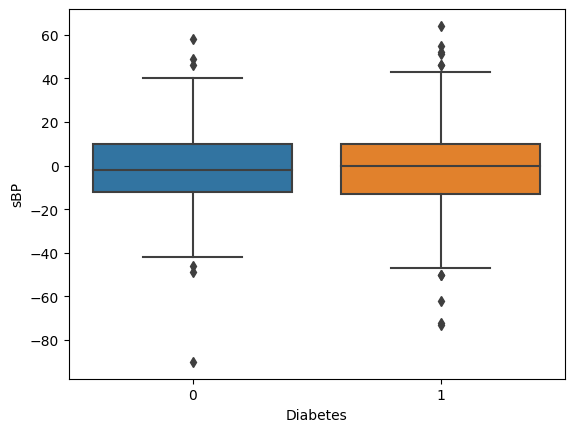

In [ ]:
sns.boxplot(x='Diabetes', y='sBP', data=dfnew)

<Axes: xlabel='Diabetes', ylabel='BMI'>

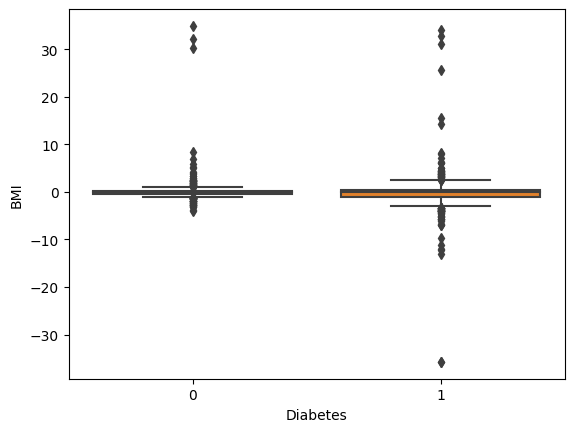

In [ ]:
sns.boxplot(x='Diabetes', y='BMI', data=dfnew)

<Axes: xlabel='Diabetes', ylabel='LDL'>

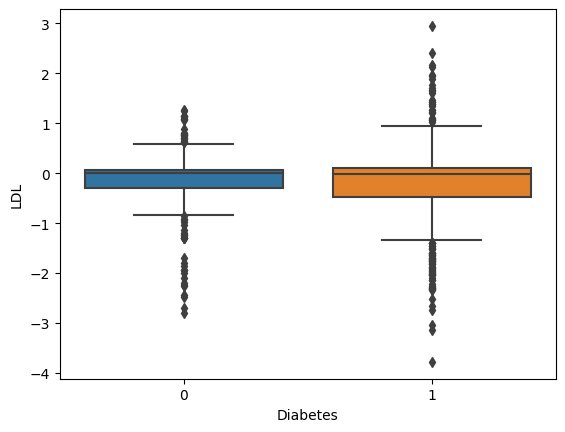

In [ ]:
sns.boxplot(x='Diabetes', y='LDL', data=dfnew)

<Axes: xlabel='Diabetes', ylabel='HDL'>

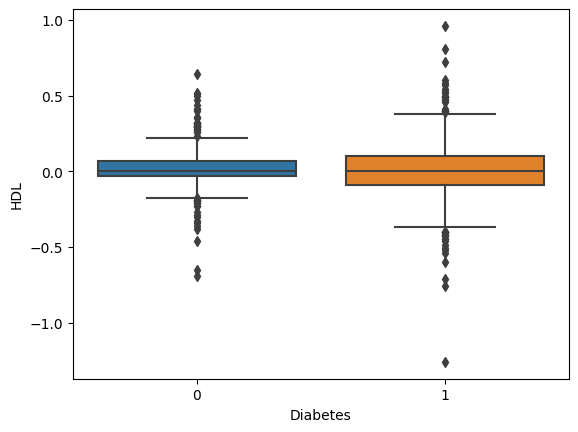

In [ ]:
sns.boxplot(x='Diabetes', y='HDL', data=dfnew)

<Axes: xlabel='Diabetes', ylabel='A1c'>

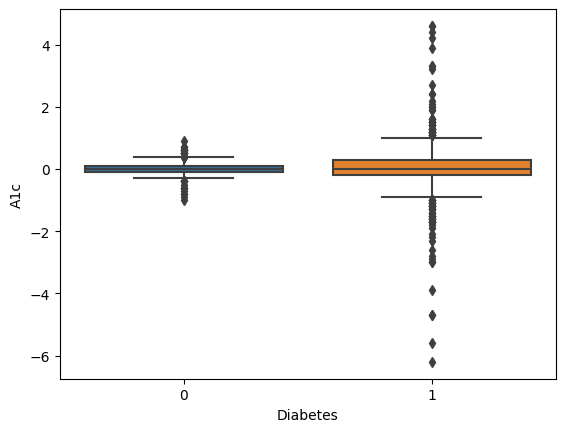

In [ ]:
sns.boxplot(x='Diabetes', y='A1c', data=dfnew)

<Axes: xlabel='Diabetes', ylabel='TG'>

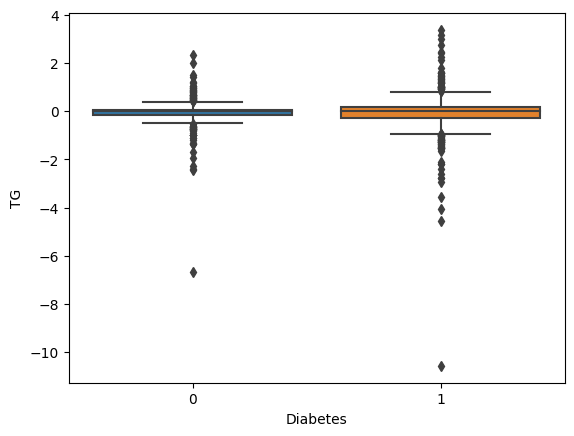

In [ ]:
sns.boxplot(x='Diabetes', y='TG', data=dfnew)

<Axes: xlabel='Diabetes', ylabel='FBS'>

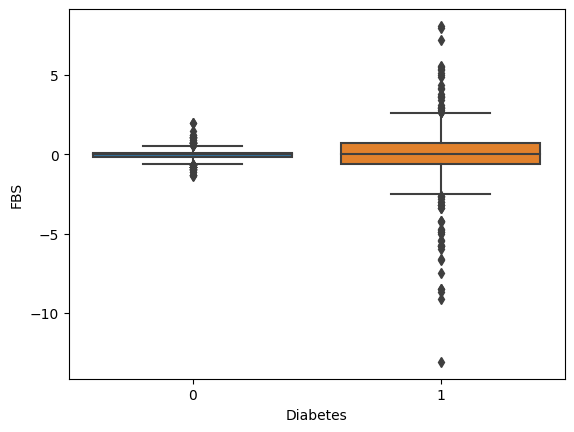

In [ ]:
sns.boxplot(x='Diabetes', y='FBS', data=dfnew)

<Axes: xlabel='Diabetes', ylabel='Total_Cholesterol'>

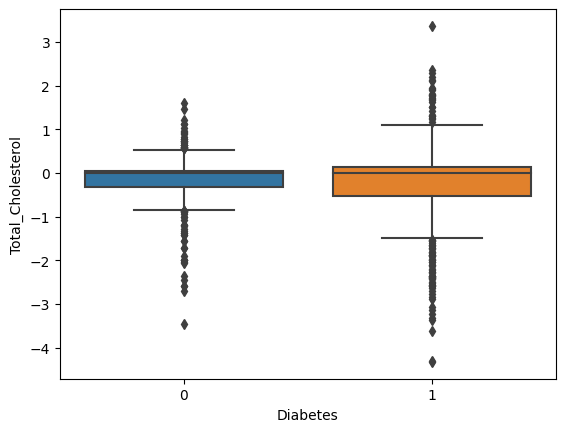

In [ ]:
sns.boxplot(x='Diabetes', y='Total_Cholesterol', data=dfnew)

<Axes: xlabel='Diabetes', ylabel='Age_at_Exam'>

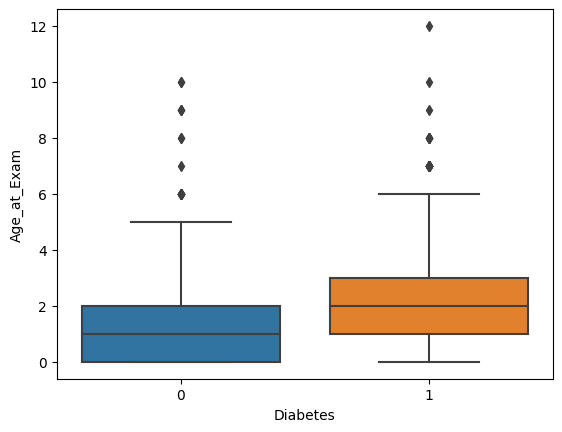

In [ ]:
sns.boxplot(x='Diabetes', y='Age_at_Exam', data=dfnew)

In [ ]:
X = dfnew.drop(columns = ['Patient_ID', 'Diabetes', 'sBP', 'BMI', 'TG', 'LDL', 'HDL'], axis=1)   # drop ones that didn't seem to have an effect from above figures
y = dfnew['Diabetes']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=16)

In [ ]:
log_reg = LogisticRegression()
k_folds = KFold(n_splits = 5)

s = cross_val_score(log_reg, X, y, cv = k_folds)

print("Cross Validation Scores: ", s)
print("Average CV Score: ", s.mean())

Cross Validation Scores:  [0.  0.5 1.  1.  1. ]
Average CV Score:  0.7


In [ ]:
import statsmodels.api as sm

# Add a constant term for the intercept
Xt = sm.add_constant(X_train)

# Create and fit logistic regression model
log_regr = sm.Logit(y_train, Xt).fit()

# Get summary report
summary = log_regr.summary()
print(summary)

Optimization terminated successfully.
         Current function value: 0.613024
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               Diabetes   No. Observations:                  769
Model:                          Logit   Df Residuals:                      763
Method:                           MLE   Df Model:                            5
Date:                Mon, 30 Oct 2023   Pseudo R-squ.:                0.009165
Time:                        17:41:25   Log-Likelihood:                -471.42
converged:                       True   LL-Null:                       -475.78
Covariance Type:            nonrobust   LLR p-value:                    0.1207
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.4614      0.184      2.504      0.012       0.100       0.823
Age_at_E

In [ ]:
log_reg.fit(X_train, y_train)
log_reg_preds = log_reg.predict(X_test)

In [ ]:
accuracy_score(y_test, log_reg_preds)

0.7212121212121212

In [ ]:
recall_score(y_test, log_reg_preds)

1.0

In [ ]:
precision_score(y_test, log_reg_preds)

0.7212121212121212

In [ ]:
conf_matrix = confusion_matrix(y_test, log_reg_preds)
class_report = classification_report(y_test, log_reg_preds)
print(class_report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        92
           1       0.72      1.00      0.84       238

    accuracy                           0.72       330
   macro avg       0.36      0.50      0.42       330
weighted avg       0.52      0.72      0.60       330



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


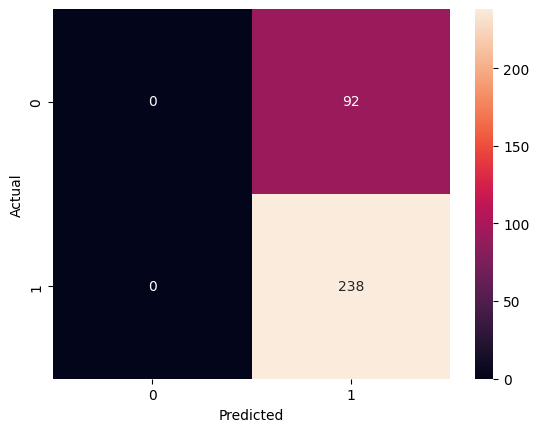

In [ ]:
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
np.mean(y_pred) # 65% of patients in the test set have diabetes, 35% don't have diabetes

0.6515151515151515

We see that logistic regression was not able to correctly predict the cases that are truly negative.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid

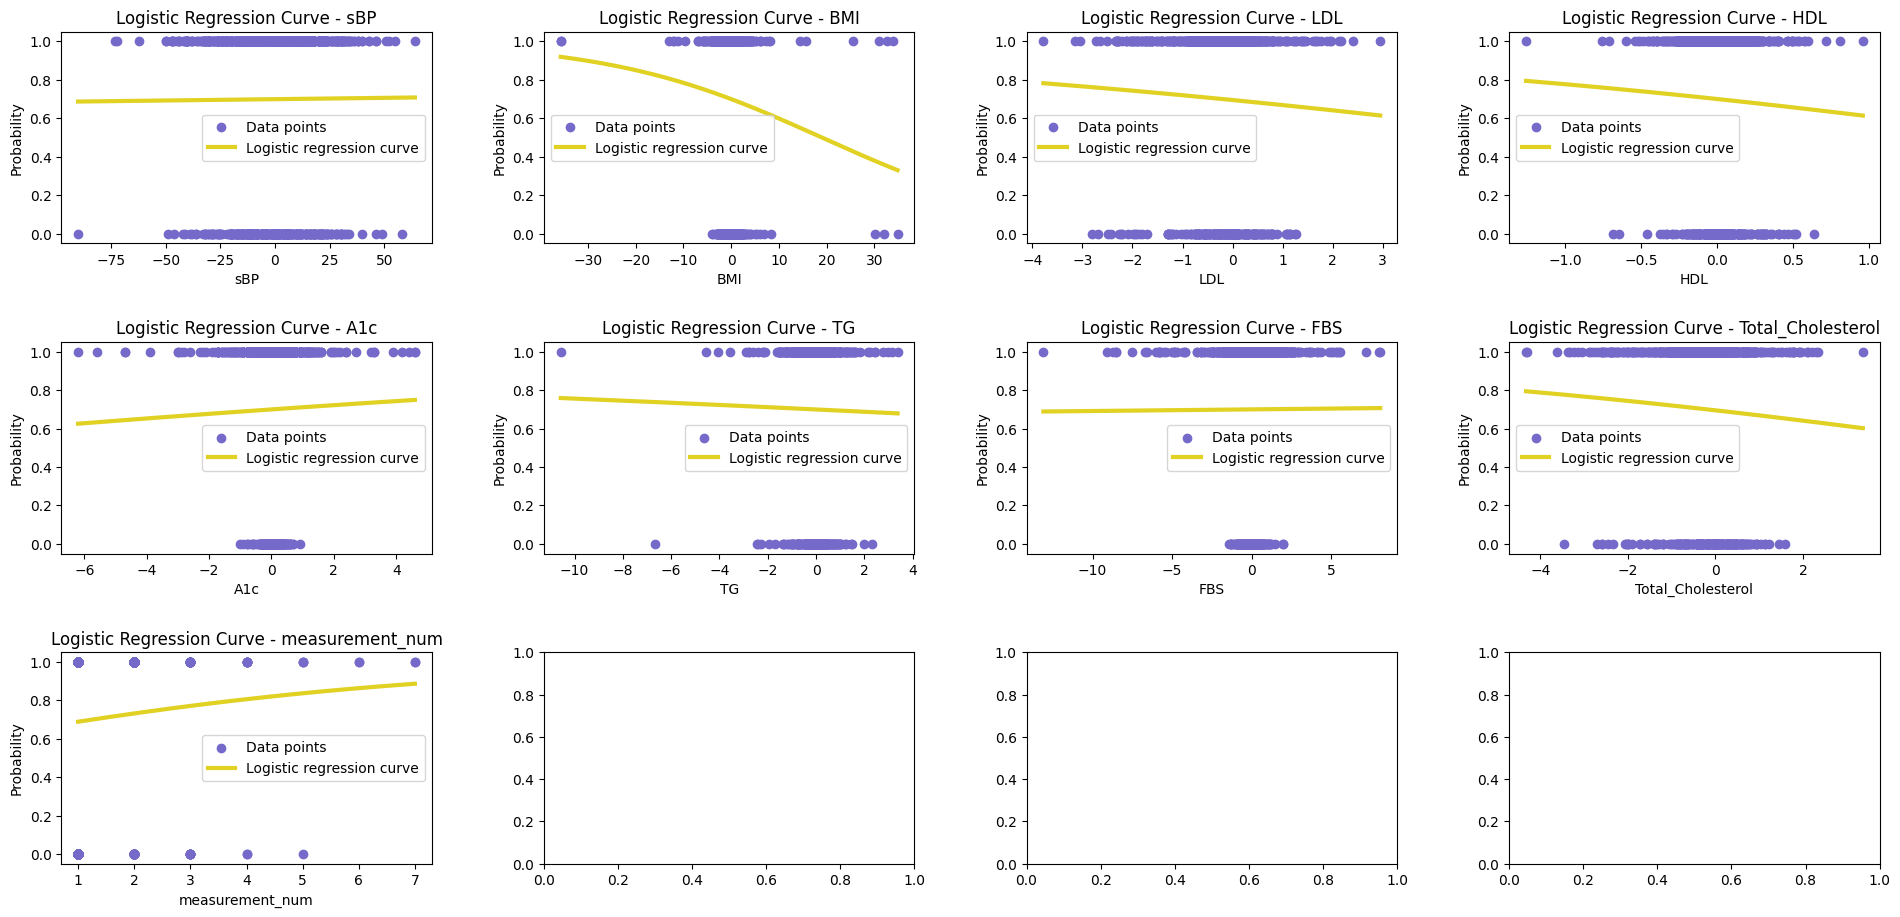

In [ ]:
fig, axs = plt.subplots(3, 4, figsize=(20, 10))
fig.tight_layout(pad=5.0)  # Adds padding between subplots

d = dfnew.drop(['Patient_ID'], axis=1)

for i, feature in enumerate(d.columns[2:]):
    row = i // 4  # Determine row index
    col = i % 4   # Determine column index

    # Reshape the feature and outcome arrays to fit the model
    X = d[[feature]]
    y = d['Diabetes']

    # Fit logistic regression model
    log_reg.fit(X, y)

    # Get min and max values of the feature for plotting
    x_test = np.linspace(X.min(), X.max(), 300)

    # Get the probability for each value in the range
    prob = log_reg.predict_proba(x_test)[:, 1]

    # Plot the data points
    axs[row, col].scatter(X, y, color='#7569c9', label='Data points')

    # Plot the sigmoid curve
    axs[row, col].plot(x_test, prob, color='#e0d122', lw=3, label='Logistic regression curve' )

    axs[row, col].set_title(f'Logistic Regression Curve - {feature}')
    axs[row, col].set_xlabel(feature)
    axs[row, col].set_ylabel('Probability')
    axs[row, col].legend()

plt.show()

We see that although logistic regression allows for us to see the effect of the explanatory variables, the method is not suitable here.

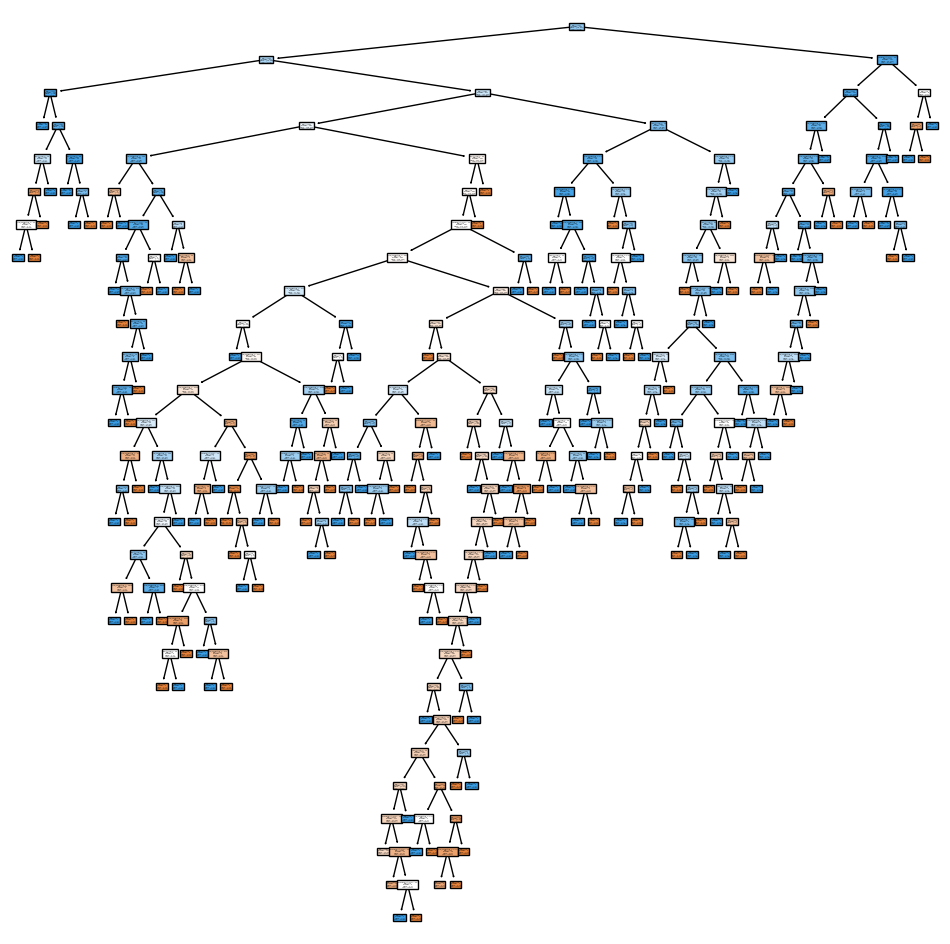

In [ ]:
clf = DecisionTreeClassifier(criterion='gini')
clf.fit(X_train, y_train)
fig, ax = plt.subplots(figsize=(12, 12))

tree.plot_tree(clf, feature_names=X_train.columns, class_names=["Failure", "Success"], filled=True)
plt.show()

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.6515151515151515


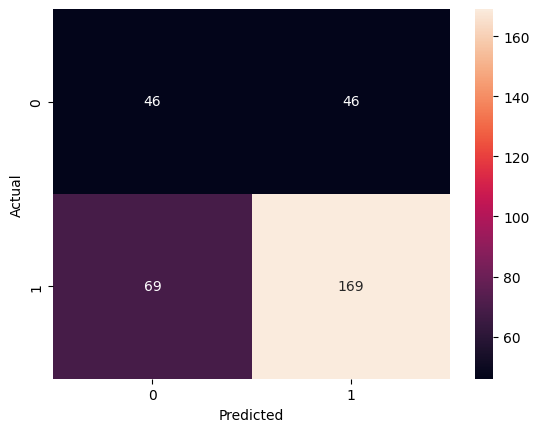

In [ ]:
conf_matrixdt = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrixdt, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
class_reportdt = classification_report(y_test, y_pred)
print(class_reportdt)

              precision    recall  f1-score   support

           0       0.40      0.50      0.44        92
           1       0.79      0.71      0.75       238

    accuracy                           0.65       330
   macro avg       0.59      0.61      0.60       330
weighted avg       0.68      0.65      0.66       330



The decision tree was able to predict some true negative cases, however the performance can still be greatly improved.

# Future directions


*   Consider ensemble methods
*   Determine a better way of accounting for repeated measurements
*   Time-to-diabetes analysis



